## <center>MNIST 데이터 셋 다루기</center>

In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
'''cpu로 설정하고 랜덤시드 고정'''

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset

mnist_train = dsets.MNIST(root='MNIST_data/',                     # mnist 데이터 경로
                          train=True,                             # false하면 test셋을 불러옴
                          transform=transforms.ToTensor(),       # 이미지 데이터이므로 텐서 형태로 데이터를 불러옴
                          download=True)                         # pc에 없으면 저장

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...


C:\Users\5788j\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True) 
# drop_last는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줌.

In [11]:
'''MNIST데이터셋은 28*28 class=10인, 이미지 데이터가 60,000개 있다.'''

mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [15]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # cross entropyloss가 Softmax 까지 알아서 계산해줌.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [16]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)          # 애초에 softmax의 입력값은 nn.linear로 들어감.
        cost = criterion(hypothesis, Y) # softmax 함수가 포함돼 있음.
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535220683
Epoch: 0002 cost = 0.359608114
Epoch: 0003 cost = 0.331501037
Epoch: 0004 cost = 0.316862196
Epoch: 0005 cost = 0.307174236
Epoch: 0006 cost = 0.300516784
Epoch: 0007 cost = 0.295169741
Epoch: 0008 cost = 0.290985465
Epoch: 0009 cost = 0.287408710
Epoch: 0010 cost = 0.284440249
Epoch: 0011 cost = 0.282086998
Epoch: 0012 cost = 0.279830843
Epoch: 0013 cost = 0.277972937
Epoch: 0014 cost = 0.276085556
Epoch: 0015 cost = 0.274497569
Learning finished


C:\Users\5788j\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\5788j\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8844000101089478
Label:  8
Prediction:  3


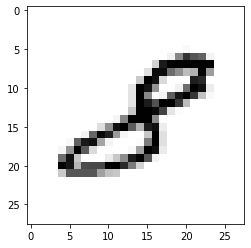

In [20]:
# Test the model using test sets

with torch.no_grad():  # test 셋이므로 기울기 계산 x
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)   # 0~10000개의 테스트 셋 데이터 중 무작위를 r로 지정
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())     # 원래 정답 레이블
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())     # 예측한 레이블
 
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')  
    plt.show()